# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Imports
import pickle
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline
import tensorflow as tf
import time
import random
import csv
import pandas as pd

from tensorflow.contrib.layers import flatten
from numpy import newaxis
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
from skimage import data
from skimage.exposure import rescale_intensity
from scipy import ndimage

print('Imports imported')

Imports imported


In [3]:
# Load the data
training_file = 'data/traffic-signs-data/train.p'
testing_file = 'data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Data Loaded')

Data Loaded


In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print("Image shape: {}".format(X_train[0].shape))
print('')
print('X Train : ',len(X_train))
print('X Validation : ',len(X_validation))
print('X Test : ',len(X_test))
print('')
print('Y Train : ',len(y_train))
print('Y Validation : ',len(y_validation))
print('Y Test : ', len(y_test))

Image shape: (32, 32, 3)

X Train :  31367
X Validation :  7842
X Test :  12630

Y Train :  31367
Y Validation :  7842
Y Test :  12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:
# Summarize the data
## Number of training examples
n_train = len(X_train) + len(y_train)

## Number of testing examples.
n_test = len(X_test) + len(y_test)

## Shape of a traffic sign image.
image_shape = X_train[0].shape

## TODO: How many unique classes/labels there are in the dataset?
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 62734
Number of testing examples = 25260
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

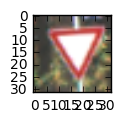

In [6]:
# Visualize the data
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize = (1, 1))
plt.imshow(image)


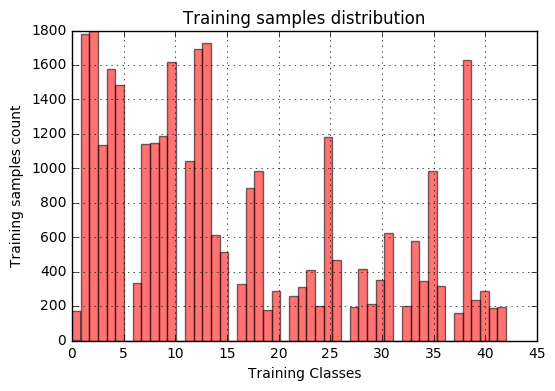

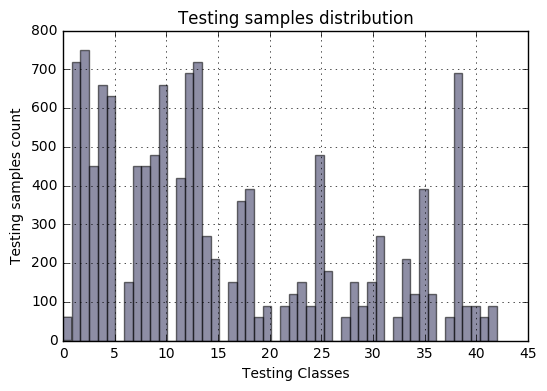

In [7]:
# Visuale Data cont.
plt.figure(1)
n, bins, patches = plt.hist(y_train, 50, facecolor="#ff0000", alpha=0.55)

plt.xlabel("Training Classes")
plt.ylabel("Training samples count")
plt.title("Training samples distribution")
plt.grid(True)

plt.figure(2)
n, bins, patches = plt.hist(y_test, 50, facecolor="#32325b", alpha=0.55)

plt.xlabel("Testing Classes")
plt.ylabel("Testing samples count")
plt.title("Testing samples distribution")
plt.grid(True)

plt.show()

In [8]:
# Generate additional data
picture_count_for_class = np.bincount(y_train)
mean_picture_count = int(np.mean(picture_count_for_class))
minimum_count_wanted_per_class = int(mean_picture_count)

angles = [-15,5,-10,10,-20,20]

for i in range(len(picture_count_for_class)):
    if picture_count_for_class[i] < minimum_count_wanted_per_class:

        rand_amount = random.randrange(100, 300)
        need_how_many = ( minimum_count_wanted_per_class - picture_count_for_class[i] ) + rand_amount
        image = np.where(y_train == i)
        more_x = []
        more_y = []
        
        for num in range(need_how_many):
            rand_amount = random.randrange(100, 300)
            more_x.append(ndimage.rotate(X_train[image][random.randint(0, picture_count_for_class[i] -1)], random.choice(angles), reshape=False))
            more_y.append(i)
            if rand_amount % 10 == 0:   
                more_x.append(ndimage.rotate(X_train[image][random.randint(0, picture_count_for_class[i] -1)], random.choice(angles), reshape=False))
                more_y.append(i)
            
        X_train = np.append(X_train, np.array(more_x), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)

print('Created additional data.')

Created additional data.


the updated number of images for training is  48902


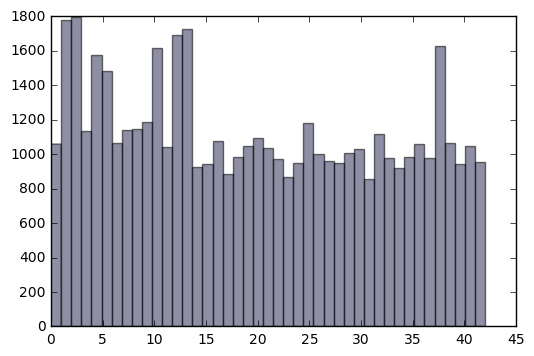

In [9]:
plt.hist(y_train, bins = n_classes,facecolor="#32325b", alpha=0.55)
updated_n_train = len(y_train)
print('the updated number of images for training is ', updated_n_train)

In [10]:
# Summarize the updated data
## Number of training examples
n_train_2 = len(X_train) + len(y_train)

## Number of testing examples.
n_test_2 = len(X_test) + len(y_test)

## Shape of a traffic sign image.
image_shape_2 = X_train[0].shape

## How many unique classes/labels there are in the dataset?
n_classes_2 = len(set(y_train))

print("Number of training examples =", n_train_2)
print("Number of testing examples =", n_test_2)
print("Image data shape =", image_shape_2)
print("Number of classes =", n_classes_2)

Number of training examples = 97804
Number of testing examples = 25260
Image data shape = (32, 32, 3)
Number of classes = 43


In [11]:
# Shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
EPOCHS = 51
BATCH_SIZE = 101

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [1]:
def Model(x):    

    mu = 0
    sigma = 0.05
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1   = tf.nn.relu(conv1)
    conv1   = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2   = tf.nn.relu(conv2)
    conv2   = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    fc0   = flatten(conv2)
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 145), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(145))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)

    fc2_W  = tf.Variable(tf.truncated_normal(shape=(145, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    # DO NOT CHANGE THE NUMBER OF CLASSES (43) ON THIS OUTPUT
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [15]:
#### 
rate = 0.001

logits = Model(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy)
learning_rate = rate 
optimizer = tf.train.AdamOptimizer(learning_rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'data/trained_model.ckpt')
    print("Model saved")
#     f = open("data/test_results.txt", "w+")
#     string = ([("Epoches : ", EPOCHS) , ("Batch Size : ", BATCH_SIZE) ,("Final Validation Accuracy = {:.3f}".format(validation_accuracy))])
#     f.write('\n'.join('%s %s' % x for x in string))
#     f.close()
    print("Epoches : ", EPOCHS , "Batch Size : ", BATCH_SIZE ,"Final Validation Accuracy = {:.3f}".format(validation_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.759

EPOCH 2 ...
Validation Accuracy = 0.892

EPOCH 3 ...
Validation Accuracy = 0.918

EPOCH 4 ...
Validation Accuracy = 0.943

EPOCH 5 ...
Validation Accuracy = 0.944

EPOCH 6 ...
Validation Accuracy = 0.958

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.961

EPOCH 9 ...
Validation Accuracy = 0.970

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.974

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.972

EPOCH 14 ...
Validation Accuracy = 0.972

EPOCH 15 ...
Validation Accuracy = 0.975

EPOCH 16 ...
Validation Accuracy = 0.973

EPOCH 17 ...
Validation Accuracy = 0.970

EPOCH 18 ...
Validation Accuracy = 0.978

EPOCH 19 ...
Validation Accuracy = 0.979

EPOCH 20 ...
Validation Accuracy = 0.976

EPOCH 21 ...
Validation Accuracy = 0.980

EPOCH 22 ...
Validation Accuracy = 0.977

EPOCH 23 ...
Validation Accuracy = 0.978

EPOCH 24 ...
Validation Accura

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_test)

    print("Training the test set...")
    print()
    for i in range(EPOCHS):
        X_test, y_test = shuffle(X_test, y_test)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_test[offset:end], y_test[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'data/tested_model.ckpt')
    print("Model saved")
#     f = open("data/test_results.txt", "w+")
#     string = ([("Epoches : ", EPOCHS) , ("Batch Size : ", BATCH_SIZE) ,("Final Validation Accuracy = {:.3f}".format(validation_accuracy))])
#     f.write('\n'.join('%s %s' % x for x in string))
#     f.close()
    print("Epoches : ", EPOCHS , "Batch Size : ", BATCH_SIZE ,"Final Validation Accuracy = {:.3f}".format(validation_accuracy))

Training the test set...

EPOCH 1 ...
Validation Accuracy = 0.274

EPOCH 2 ...
Validation Accuracy = 0.485

EPOCH 3 ...
Validation Accuracy = 0.603

EPOCH 4 ...
Validation Accuracy = 0.713

EPOCH 5 ...
Validation Accuracy = 0.755

EPOCH 6 ...
Validation Accuracy = 0.800

EPOCH 7 ...
Validation Accuracy = 0.805

EPOCH 8 ...
Validation Accuracy = 0.796

EPOCH 9 ...
Validation Accuracy = 0.823

EPOCH 10 ...
Validation Accuracy = 0.815

EPOCH 11 ...
Validation Accuracy = 0.839

EPOCH 12 ...
Validation Accuracy = 0.856

EPOCH 13 ...
Validation Accuracy = 0.848

EPOCH 14 ...
Validation Accuracy = 0.858

EPOCH 15 ...
Validation Accuracy = 0.862

EPOCH 16 ...
Validation Accuracy = 0.868

EPOCH 17 ...
Validation Accuracy = 0.864

EPOCH 18 ...
Validation Accuracy = 0.871

EPOCH 19 ...
Validation Accuracy = 0.866

EPOCH 20 ...
Validation Accuracy = 0.876

EPOCH 21 ...
Validation Accuracy = 0.870

EPOCH 22 ...
Validation Accuracy = 0.876

EPOCH 23 ...
Validation Accuracy = 0.877

EPOCH 24 ...
Vali

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

* The first desicion I made was to keep the images as color images.  Based on things I read it seemed that some groups 
  would convert to grayscale and some would not.  I was unable to find difinitive proof that one way was better than
  another.  Since the color of the traffic signs does have some importance I decided, in an effort to keep this as 
  agile as possible for future development, to keep the images as color images.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

#### Validation
* Split off two validation sets, x and y, using the train_test_split function.  
  Used those two sets in the evaluate function.

#### Additional Data

* I did generate additional data.  There were some classes that were lower in examples than others.  I saw 
  examples were this was brought up to avoid overfitting to certain classes. After visualizing the data I brought the   number of examples of lower classes up so everything would be represented. First step was finding the mean and then   after that I added a random number between 100 and 300.  The angles of the images was also randomly adjusted. I       further selected random images to adjust the angle and save once again. My only reason for that is I like to try to   have a little amount of randomization in. I may drop the randomization as I get more knowledgable but until then a     little bit of randomization seemed to help. Generating the additional data did provide a boost in accuracy on the     training run.

* The data was then shuffled.  This code was taken directly from the LeNet lab.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The training function loops for the number of epoches set.  At the very beginning the training data is shuffled.  The data is then broken up into batches based on the batch size set.  The model is then trained using each batch.

#### Optimizer 

The types of optimizers I experimented with were
* GradientDescentOptimizer 
* AdagradOptimizer
* AdamOptimizer

My decision to try different types was trial and error.  I used the documentation (https://www.tensorflow.org/api_docs/python/train/) to find the different types, read up on them a as much as I could and try them out.  My decision to go with the AdamOptimizer was simply that is produced the best results.

#### Batch Size

I adjusted the batch size to see if it affected accuracy at all.  Increasing and decreasing.  I found that overall it made little to no improvement to increase the batch size.  Sometimes there would be a slight improvement but it always seemed to flatten out and stick right around a value after about  a certain number of epochs. I tried batches as small as 50 and as large as 350.  I settled at 101 just because that area produced the best results.

#### Epochs

Epochs was another parameter that I tweaked on a trial and error basis.  I did find that there seemed to be a sweet spot and anything above or below that produce worse results.  I settled at 51 because that area produced the best results.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

* My approach was to change various parameters in order to see how they influenced the results and was completely       trial and error.  The majority of my time was spent on tweaking the stride and padding variables to see what affect   that had on accuracy.  I also experimented with pooling types.

* The architecture was based off of the LeNet lab but was also based on architecture described in various papers I       read while working on this project.  Overall the structures seemed to be similar.  My initial impluse was to add       more to the network.  More layers, more tweaking, more variation.  The results from that actually seemed to lower     the accuracy in most cases, and in some instance by considerable margins, so I abandoned the trial and error           approach and instead focused on small tweaks to the structure that was already there.  


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

0.jpg


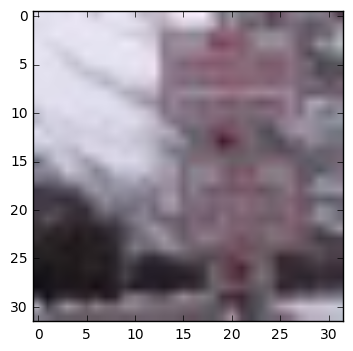

1.jpg


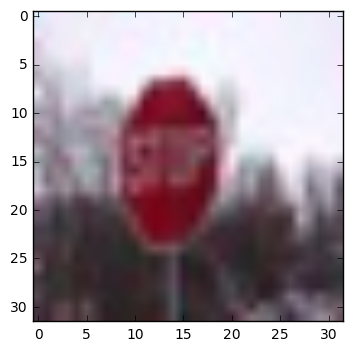

2.jpg


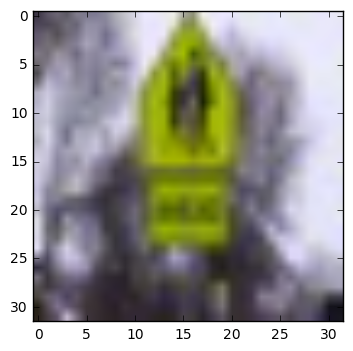

3.jpg


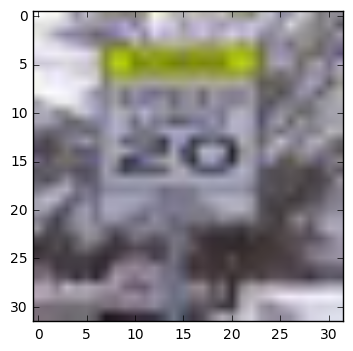

4.jpg


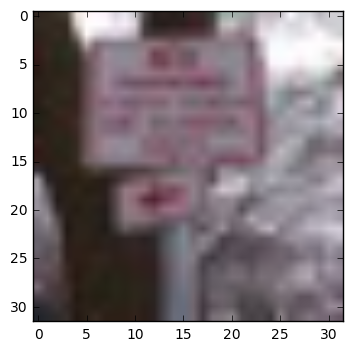

4


In [96]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
add_additional_images = os.listdir("data/additional_data/")
additional_images = np.uint8(np.zeros((10,32,32,3)))
add_additional_images = add_additional_images[1:6]
integer = 0

for i in add_additional_images:
    print(i)
    i = "data/additional_data/" + i
    image = mpimage.imread(i)
    plt.imshow(image)
    plt.show()
    additional_images[integer] = image
    integer += 1

additional_images_data = additional_images.reshape((-1, 32,32,3)).astype(np.float32)
print(len(additional_images_data.shape))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
* The first image was actually two signs, one above another.  These are pretty common around schools and parking areas 
  so I wanted to capture one and try to use it.
* The second image was a stop sign.  I figured this should easily identified.
* I hope that the crossing sign is also easily identified due to it's strong color contrast.
* I thought the speed sign might be easily identified because of its shape.
* The last image was a single sign, similar to the double sign for the first image.  Curious to see how it would perform on this image.

In [64]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    saver.restore(sess, 'data/trained_model.ckpt')
    print('model restored')

    new_image_classes = sess.run(logits, feed_dict={x: additional_images_data, keep_prob: 1.0})
    
# print(new_image_classes)

model restored


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

It does not perform nearly as well on the images I took myself.  It ended up being at 20%.

In [129]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predictions = sess.run(tf.nn.top_k(new_image_classes, k=5, sorted=True))
    
for i in range(5):
    print('Probablilities : ',predictions[0][i])
    print('Classes : ', predictions[1][i])

Probablilities :  [ 2.39492178  1.70123363  1.32921696  1.13477397  1.11020422]
Classes :  [ 0 26  1  4 18]
Probablilities :  [ 11.82424736   2.30504608   1.35884678   1.34834552  -0.94567466]
Classes :  [14 29 25 22 17]
Probablilities :  [ 2.07036448  2.06717968  1.29369199  0.60284203  0.51098114]
Classes :  [13 38 12 34 29]
Probablilities :  [ 5.0971489   3.03134775  1.52539611  1.48362935  0.39312997]
Classes :  [37 39 40 33 36]
Probablilities :  [ 2.3701129   1.99518144  0.55337876  0.15671894  0.04560882]
Classes :  [38 36 34 35 20]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

**Answer:**

The classes returned where: 0, 14, 38, 40 and 38.

* Class 0 is Speed limit sign, it was roughly 2% sure and it waas incorrect.
* Class 14 is a stop sign, it was roughly 11% sure on this but it was correct.
* Class 13 is a Yield sign, it was roughly 2% sure and it was incorrect.
* Class 37 is a Go Straight or Left sign, it was roughly 5% sure and it was incorrect.
    * If you look at the sign it does appear to be an arrow pointing left so I think this was a close call, even though it did get it wrong.
* Class 38 is a Keep it Right sign, it was roughly 2% sure and was incorrect.

Overall it seemed the model was unsure of these images.  




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

**References:**
A list of all materials I read while preparing this submission. 

* Smith Leslie N. and Nicholay Topin.  Deep Convolutional Neural Network Design Patterns.  
* Zeiler Matthew D. and Rob Fergus. Visualizing and Understanding Convolutional Networks.
* Boureau, Y-Lan, Jean Ponce and Yann Lecun.  A Theoretical Analysis of Feature Pooling in Visual Recognition.
* Deshpande Adit.  A Beginner's Guide to Understanding Convolutional Neural Networks.
* Sermanet Pierre, Koray Kavukcuoglu and Yuan LeCun. Traffic Signs and Pedestrian Vision with Multi-Scale Convolutional Networks.
* Zeng Yujin, Xin Xu, Yuqiang Fang, Kun Zhao. Traffic Sign Recognition Using Extreme Learning Classifier with Deep Convolutional Features.
* https://www.tensorflow.org/
* https://groups.google.com/forum/#!topic/theano-users/Hw_ejZnVQo0
* http://stats.stackexchange.com/questions/185853/why-do-we-need-to-normalize-the-images-before-we-put-them-into-cnn
* http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_adapt_rgb.html